In [3]:
import numpy as np
import healpy as hp
import astropy.units as u
import matplotlib.pyplot as plt


In [8]:
nside = 2
npix = hp.nside2npix(nside)
data = np.zeros(npix)
center = hp.query_disc(nside, [1,0,0], radius=(35*u.deg).to_value(u.radian))
data[center] = 1

In [9]:
def get_unique_positions(lower_res,higher_res):
    res = hp.nside2resol(higher_res)*u.rad.to(u.deg)
    side_pixels = higher_res/lower_res
    x = np.arange(0,side_pixels,1)
    y = np.arange(0,side_pixels,1)
    
    vec_rot = []
    for i in x:
        for j in y:
            vec_rot.append(np.array([res*(i-j)/np.sqrt(2),res*(i+j)/np.sqrt(2)]))
    
    return np.array(vec_rot)

pos = get_unique_positions(1,nside)



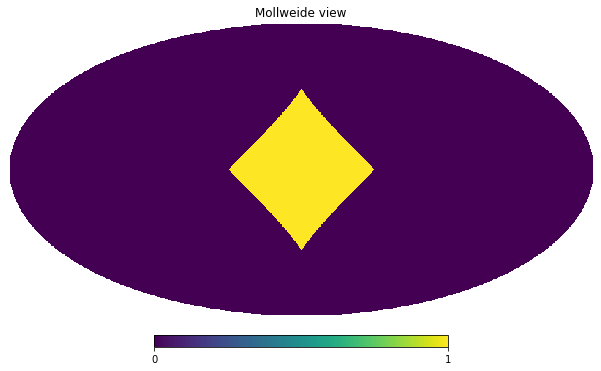

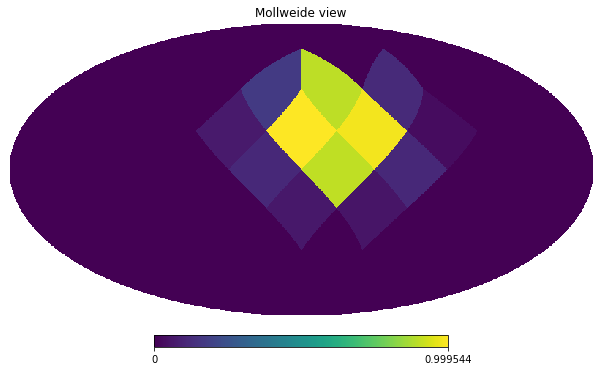

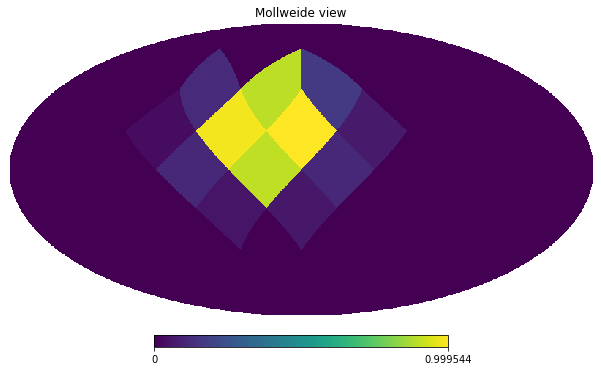

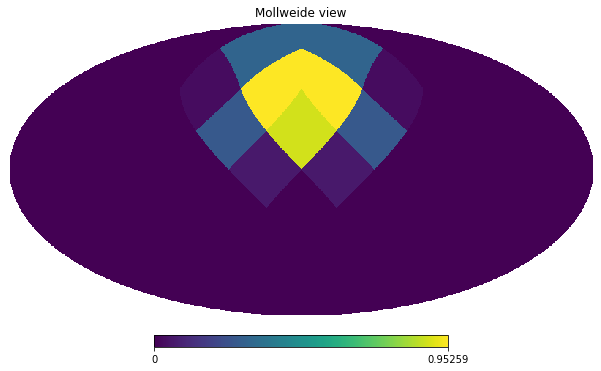

In [12]:
for i in range(len(pos)):
    rotate = hp.Rotator(pos[i],inv = True)
    rotate_pixel = rotate.rotate_map_pixel(data)    
    hp.mollview(rotate_pixel)